# Diabetese ANN

# Installing Libraries

In [2]:
pip install tensorflow

# EDA

In [3]:
import pandas as pd

In [4]:
file_path='/content/drive/MyDrive/İBB_Yapay_Zeka_Uzmanlığı_Bootcampi/12.Ders/diabetes.csv'

In [5]:
df=pd.read_csv(file_path)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Importing Libraries

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
y=df['Outcome']
X=df.drop('Outcome', axis=1)

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df.shape

(768, 9)

In [12]:
#Preprocessing of independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [13]:
model=Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='relu'))
#drop
#model.add(Drop(1, activation='sigmoid')) #Normally I need to use drop to overcome overfitting
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy','Precision','Recall']) #I use compile to see results.

In [14]:
#Optimal values find by trying different epoch and batch sizes.

history=model.fit(X,y,epochs=50,batch_size=32,validation_split=.20,verbose=1)
#epoch=iteration times of data set
#Batchsize=Part size of data
#verbose her epoch ta yazsın

Epoch 1/50
20/20 [==============================] - 2s 29ms/step - loss: 0.6619 - accuracy: 0.6336 - precision: 0.4764 - recall: 0.5681 - val_loss: 0.6052 - val_accuracy: 0.7403 - val_precision: 0.6744 - val_recall: 0.5273
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5579 - accuracy: 0.7492 - precision: 0.6810 - recall: 0.5211 - val_loss: 0.5266 - val_accuracy: 0.7532 - val_precision: 0.7297 - val_recall: 0.4909
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4908 - accuracy: 0.7720 - precision: 0.7325 - recall: 0.5399 - val_loss: 0.4919 - val_accuracy: 0.7662 - val_precision: 0.7209 - val_recall: 0.5636
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4610 - accuracy: 0.7752 - precision: 0.7049 - recall: 0.6056 - val_loss: 0.4923 - val_accuracy: 0.7662 - val_precision: 0.7568 - val_recall: 0.5091
Epoch 5/50
20/20 [==============================] - 0s 7ms/step - loss: 0.4528 - accuracy: 0.7866 - precision: 

In [15]:
model.summary() #We sneak into model summary.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               1080      
                                                                 
 dense_1 (Dense)             (None, 64)                7744      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 9221 (36.02 KB)
Trainable params: 9221 (36.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
history.history

{'loss': [0.6618751883506775,
  0.5578793883323669,
  0.49077513813972473,
  0.461019366979599,
  0.45278653502464294,
  0.4460485875606537,
  0.44081950187683105,
  0.4345892071723938,
  0.4287753105163574,
  0.42412376403808594,
  0.42334645986557007,
  0.4193063974380493,
  0.4157419502735138,
  0.4123944044113159,
  0.4083119034767151,
  0.40674662590026855,
  0.4012010991573334,
  0.4029487371444702,
  0.39690136909484863,
  0.3957802951335907,
  0.39815089106559753,
  0.38651043176651,
  0.3834191858768463,
  0.38167309761047363,
  0.37684836983680725,
  0.37001803517341614,
  0.3694787621498108,
  0.3651697635650635,
  0.3592120110988617,
  0.35424986481666565,
  0.35232236981391907,
  0.35538819432258606,
  0.34361058473587036,
  0.3384518623352051,
  0.3384353816509247,
  0.32950592041015625,
  0.32697880268096924,
  0.3300888240337372,
  0.3184308707714081,
  0.3152889907360077,
  0.3078833520412445,
  0.2998582124710083,
  0.29407528042793274,
  0.290591299533844,
  0.290273

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

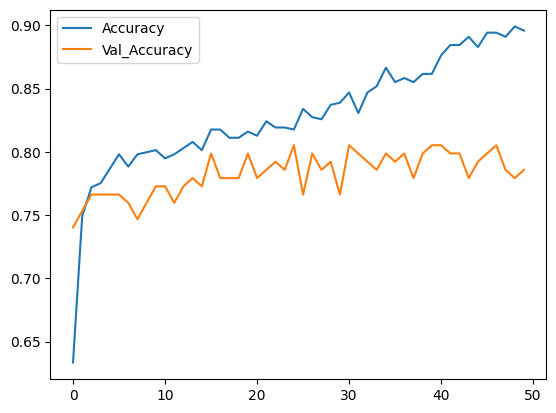

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
#Make a prediction using real life datas

import numpy as np

#Writing function for converting datas into standartized form

def predict_diabetes(input_data):
  # Convert input data into a Numpy array
  input_data_as_numpy_array=np.asarray(input_data)

  # Reshape the array as we are predicting for one instance
  input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

  # Standartisize the input data
  standartized_input_data=scaler.transform(input_data_reshaped)

  print('Standartized values:',standartized_input_data)
  # Predict using the model
  prediction=model.predict(standartized_input_data)

  # Print the prediction
  print('Prediction propability:',prediction[0])
  if prediction[0] >0.5:
    print('Prediction Diabet-Pozitive')
  else:
    print('Prediction Diabete-Negative')

#Get input from user

input_data=[]
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in columns:
  value=float(input("Enter inputs "+ column + ": "))
  input_data.append(value)

#Data Prediction
predict_diabetes(input_data)

Enter inputs Pregnancies: 0
Enter inputs Glucose: 97
Enter inputs BloodPressure: 65
Enter inputs SkinThickness: 35
Enter inputs Insulin: 85
Enter inputs BMI: 29
Enter inputs DiabetesPedigreeFunction: 0.351
Enter inputs Age: 35
Standartized values: [[-1.14185152 -0.74783062 -0.2122435   0.90726993  0.04515558 -0.37981576
  -0.36506078  0.14967911]]
1/1 [==============================] - 0s 73ms/step
Prediction propability: [0.20461138]
Prediction Diabete-Negative


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
